#Q.8 40.103


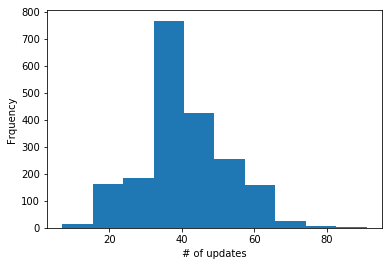

In [1]:
## Date: 2017-10-12
## Purpose: Machine Learning Fundation hw1
## Author: Po-Chu Chen

## Import the package
import random
import numpy as np 
import matplotlib.pyplot as pyplt

# Define the function to import Xn, Yn vector of data-set
def read_xy(fname):
    data = np.loadtxt(fname)
    m = data.shape[0]
    x = np.hstack((np.ones((m, 1)), data[:,:-1])) # Adding the (1,1,1...) dimension to Vector Xn
    y = data[:,-1] # Vector Yn
    return x, y

# Define the Sign function
def sign(x):
    vfunc = np.vectorize(lambda t: 1 if t > 0 else -1)
    return vfunc(x)
    
# Define the PLA process whose algorithm visiting the point in a pre-determined and random order 
def PLA(x, y):
    m, n = x.shape
    w = np.zeros(n) # import zero-vector as the initial vector 
    steps = 0
    indexs = np.arange(m)
    random.shuffle(indexs)
    pointer = 0
    m_correct = 0
    while m_correct < m:
        i = indexs[pointer]
        if  sign(x[i].dot(w)) != y[i]:
            m_correct = 0 # if some point is incorrect, this will reset to 0 to let algorithm check the point again
            w = w + y[i]*x[i]
            steps = steps + 1 # Steps mean the # that vector W is modified
        else:
           m_correct = m_correct + 1 
        pointer = pointer + 1 if pointer < m - 1 else 0
    return w, steps


# Start the Module
if __name__ == '__main__': 
    
    
    x, y = read_xy('hw1_15_train.dat.txt')
    # Q.8
    T = 2000
    all_steps = [PLA(x, y)[1] for k in range(T)] 
    print('#Q.8', np.mean(all_steps))
    pyplt.xlabel('# of updates')
    pyplt.ylabel('Frquency')
    pyplt.hist(all_steps)
    pyplt.show()
    

    